# Crutch company's Used Vehicles

Here, I would like to look at Clutch company's inventory of certified used vehicles. I will scrape the data from the Clutch company's website, clean them and finally visulize the results and analyse them.

## Data Scaping


In [445]:

import pandas as pd
from requests import get
from bs4 import BeautifulSoup
import unicodedata
from unicodedata import normalize


I am going to use the BeautifulSoup library to parse the HTML content of this website.

In [ ]:
url = '/Users/hossein/clutch.html'
with open(url) as html_file:
    html_soup = BeautifulSoup(html_file, 'html.parser')

The following data will be extraced for each car:

+ Model
+ Make
+ Price 
+ Mileage
+ Year 

    

In [446]:
car_info_containers = html_soup.find_all('div', class_ = 'card_container vehicle-card_container card_container__clickable')
print(type(car_info_containers))
print(len(car_info_containers))

<class 'bs4.element.ResultSet'>
242


In [447]:
first_car_info = car_info_containers[0]

In [448]:
model_info = first_car_info.find('div', class_ = 'vehicle-card_content_model').text
model_info = normalize("NFKD", model_info)
model_info

'Ghibli Q4 '

In [449]:
make_info = first_car_info.find('div', class_ = 'vehicle-card_content_make').text
make_info

'Maserati'

In [450]:
price_info = first_car_info.find('div', class_ = 'vehicle-card_content_price').text
price_info

'$53,990'

In [451]:
year_mileage_info = first_car_info.find('div', class_ = 'vehicle-card_content_details_year-mileage').text
year_mileage_info

'2015\xa0•\xa070K\xa0km'

In [452]:
biweekly_info = first_car_info.find('div', class_ = 'vehicle-card_content_details_biweekly').text
biweekly_info

'$430\xa0Biweekly'

In [453]:
model = []
make = []
price = []
yearmileage = []
biweekly = []

In [454]:
for container in car_info_containers:
    model_info = container.find('div', class_ = 'vehicle-card_content_model').text
    model_info = normalize("NFKD", model_info) # to remove \xa0 from string
    model.append(model_info)
    make_info = container.find('div', class_ = 'vehicle-card_content_make').text
    make_info = normalize("NFKD", make_info)
    make.append(make_info)    
    price_info = container.find('div', class_ = 'vehicle-card_content_price').text
    price_info = normalize("NFKD", price_info)
    price.append(price_info)    
    year_mileage_info = container.find('div', class_ = 'vehicle-card_content_details_year-mileage').text
    year_mileage_info = normalize("NFKD", year_mileage_info)
    yearmileage.append(year_mileage_info)    
    biweekly_info = container.find('div', class_ = 'vehicle-card_content_details_biweekly').text
    biweekly_info = normalize("NFKD", biweekly_info)
    biweekly.append(biweekly_info)    
    

In [455]:
df = pd.DataFrame({'model': model,
                       'make': make,
                       'price': price,
                       'year_mileage': yearmileage,
                       'biweekly_rate': biweekly})

print(df.info())

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 5 columns):
model            242 non-null object
make             242 non-null object
price            242 non-null object
year_mileage     242 non-null object
biweekly_rate    242 non-null object
dtypes: object(5)
memory usage: 9.5+ KB
None


,model,make,price,year_mileage,biweekly_rate
0,Ghibli Q4,Maserati,"$53,990",2015 • 70K km,$430 Biweekly
1,Civic Si,Honda,"$18,800",2014 • 45K km,$151 Biweekly
2,RAV4 XLE,Toyota,"$19,950",2015 • 79K km,$161 Biweekly
3,Mazda3 GT Premium,Mazda,"$23,850",2018 • 24K km,$191 Biweekly
4,Highlander LE,Toyota,"$26,200",2015 • 68K km,$210 Biweekly


## Data Cleaning

In [456]:

dfcols = df.columns
df[dfcols] = df[dfcols].replace({'\$':'', 'Biweekly':'', '•':'', 'km':'', ',':''}, regex = True)
df['year_mileage'] = df['year_mileage'].replace({'K':''}, regex = True)
year_mileage = df["year_mileage"].str.split("  ", n = 1, expand = True)
df["year"]= year_mileage[0] 
df["mileage"]= year_mileage[1] 
df.drop(columns =["year_mileage"], inplace = True)

df.head()

,model,make,price,biweekly_rate,year,mileage
0,Ghibli Q4,Maserati,53990,430,2015,70
1,Civic Si,Honda,18800,151,2014,45
2,RAV4 XLE,Toyota,19950,161,2015,79
3,Mazda3 GT Premium,Mazda,23850,191,2018,24
4,Highlander LE,Toyota,26200,210,2015,68


In [457]:
df['price'] = df['price'].astype(float)
df['biweekly_rate'] = df['biweekly_rate'].astype(float)
df['year'] = df['year'].astype(int)
df['mileage'] = df['mileage'].astype(int)*1000
df['model'] = df['model'].astype(str)
df['make'] = df['make'].astype(str)


In [458]:
df.head()


,model,make,price,biweekly_rate,year,mileage
0,Ghibli Q4,Maserati,53990.0,430.0,2015,70000
1,Civic Si,Honda,18800.0,151.0,2014,45000
2,RAV4 XLE,Toyota,19950.0,161.0,2015,79000
3,Mazda3 GT Premium,Mazda,23850.0,191.0,2018,24000
4,Highlander LE,Toyota,26200.0,210.0,2015,68000


## Data Visualization


 



In [459]:
from pandas.tools.plotting import scatter_matrix

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

In [460]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

Text(0.5,1,'Year vs Price')

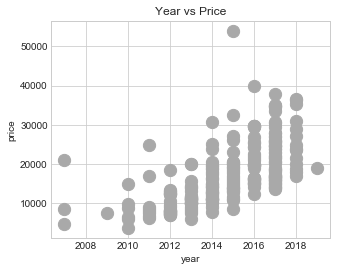

In [482]:
df.plot(kind='scatter', x='year', y='price', c=['darkgray'], s=150)

plt.xlabel('year')
plt.ylabel('price')
plt.title('Year vs Price')

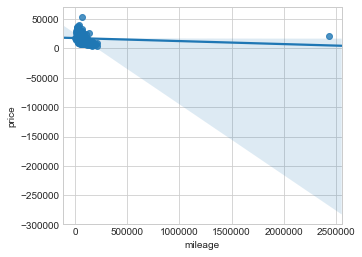

In [465]:
sb.regplot(x='mileage', y='price', data=df, scatter=True)

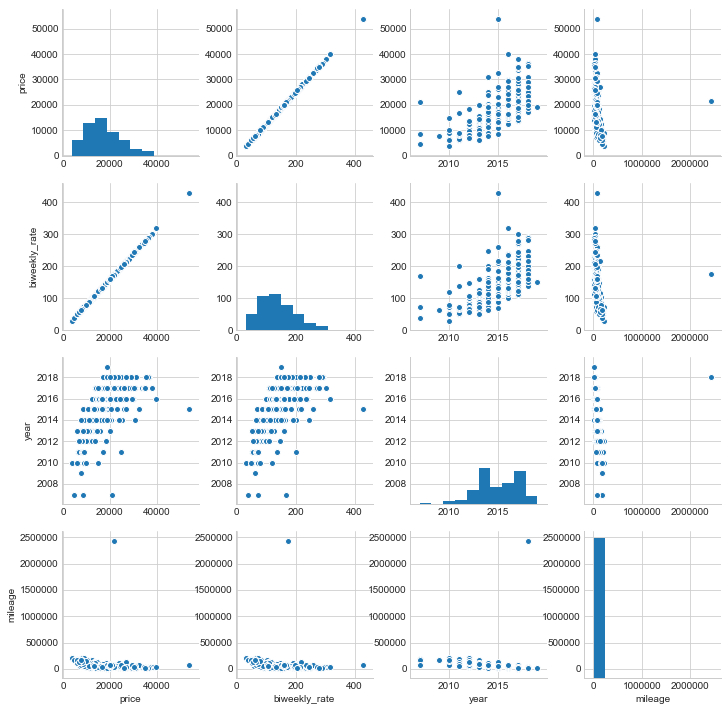

In [466]:
sb.pairplot(df)

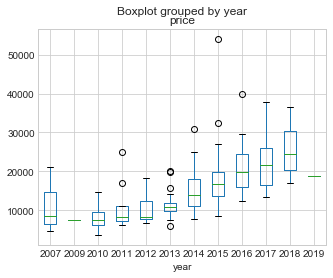

In [476]:
df.boxplot(column='price', by='year')

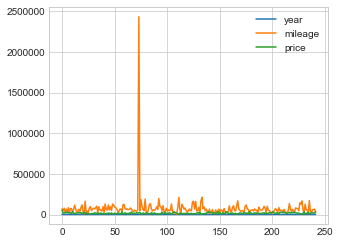

In [480]:

df = df[['year', 'mileage', 'price']]
df.plot()

In [477]:
df['price'].max()

53990.0

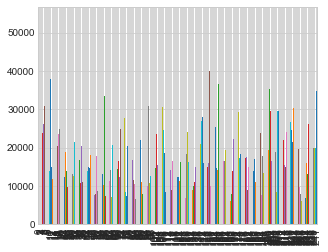

In [491]:
df['price'].plot(kind='bar')